In [1]:
function mon(array)
  result = Float64[]
  last = array[1]
  for elt in array
    new_last = minimum([elt, last])
    push!(result, new_last)
    last = new_last
  end
  return result
end
using Revise
using ConvexHullPricing
using Plots
using JLD2
using HyperTuning

const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-02
Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-02


ConvexHullPricing.Optimizer

In [5]:
CoarseResults = load_object("..//results//HPopt//nCoarseBLM-BE.jld2")

10-element Vector{Any}:
 Any[0.2, [47.02612060767581, 46.24747621113825, 46.070388266468875, 45.65293341599395, 45.53013383421083, 45.70877673934688, 45.58695243267914, 44.49273784031194, 43.50143489864327, 45.454818488140155  …  46.33367137885389, 44.04116605607346, 43.31790240493153, 46.559611518598395, 46.805703752002586, 46.14606198477131, 53.221026707688786, 46.147188273273045, 44.37165452988404, 43.79032911814756], [[46.32467674418604, 46.12901306144043, 46.038775870471255, 45.61395589668845, 45.61817290998425, 45.62216000011363, 44.4739, 44.4739, 43.4767, 43.93481206896551  …  46.276443963991625, 44.4739, 42.90129197108141, 46.86590802891859, 46.93363629735374, 47.16012499871823, 49.04095296181497, 47.44848357289528, 44.4739, 44.4739], [104.09883769240821, 127.39189839508411, 109.52608784514214, 114.42051932579858, 107.04325201308919, 99.33841622617165, 126.81591251471036, 106.01354759596931, 84.16488189457334, 79.38557714686173  …  180.10554044550506, 170.72401898752418, 173.14

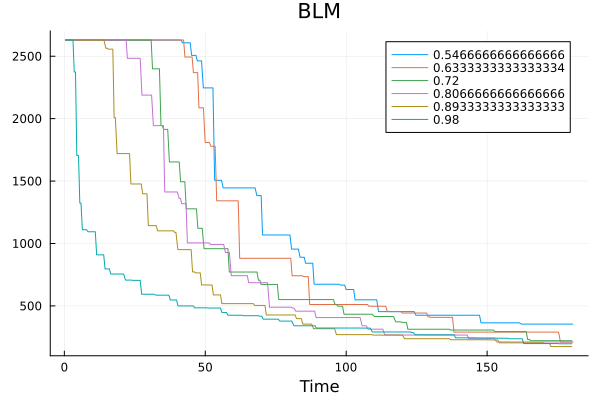

In [7]:
plot(title="BLM")
FS = maximum(load_object("..//results//optimal_values//NewRefinedOptRunBE8.jld2")[3])
for result in CoarseResults[5:10]
  plot!(result[5][2:end], mon(FS .- result[4]), label="$(result[1])")
end
plot!(xlabel="Time")